## Customer Churn
Customer churn occurs when an existing customer, user, subscriber, or any kind of return client stops doing business or ends the relationship with a company.

### Types of Customer Churn
- **Contractual Churn**: When a customer is under a contract for a service and decides to cancel the service (e.g., Cable TV, SaaS).
- **Voluntary Churn**: When a user voluntarily cancels a service (e.g., Cellular connection).
- **Non-Contractual Churn**: When a customer is not under a contract for a service and decides to cancel the service (e.g., Consumer Loyalty in retail stores).
- **Involuntary Churn**: When a churn occurs without any request of the customer (e.g., Credit card expiration).

### Reasons for Voluntary Churn
- Lack of usage
- Poor service
- Better price
Better price

Importing the required dataset and the libraries

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
dataset = pd.read_csv('TelecomChurn.csv')

# Print all the features of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

### Exploratory Data Analysis on Telco Churn Dataset

In [2]:
# Find the number of churners and non-churners in the dataset
dataset['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [3]:
# Group data by 'churn' and 'customer service calls'
print(dataset.groupby('churn')['customer service calls'].mean())

churn
False    1.449825
True     2.229814
Name: customer service calls, dtype: float64


In [4]:
# Find out if one state has more churners compared to another

# Count the number of churners and non-churners by state
print(dataset.groupby('state')['churn'].value_counts())

state  churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: count, Length: 102, dtype: int64


### Exploring Data Visualizations

To understand how variables are distributed

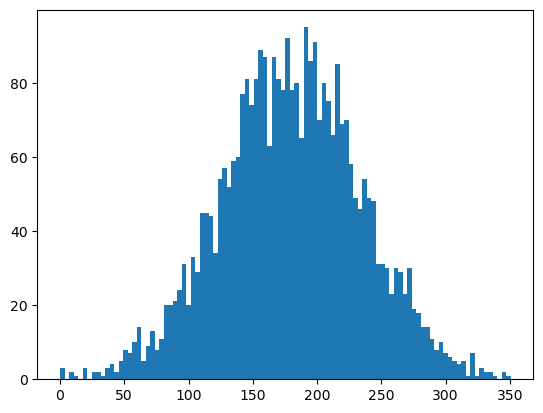

In [5]:
# Visualize the distribution of 'Total day minutes'
plt.hist(dataset['total day minutes'], bins = 100)

# Display the plot
plt.show()

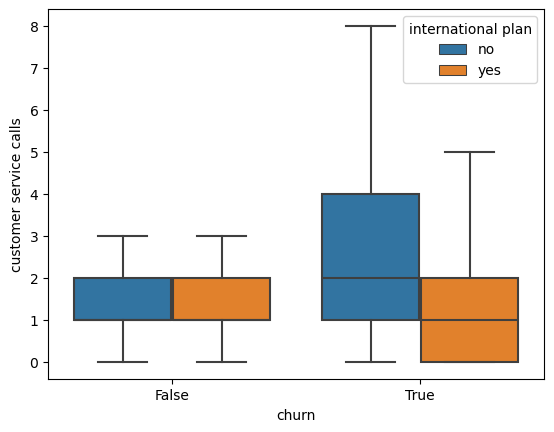

In [6]:
# To visualize the difference in Customer service calls between 
# churners and non-churners

# Create a box plot
sns.boxplot(x = 'churn',
            y = 'customer service calls',
            data = dataset,
            sym = "",
            hue = 'international plan')

# Display the plot
plt.show()

It looks like customers who do churn end up leaving more customer service calls unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn.

### Data Preprocessing for Telco Churn Dataset

  Many Machine Learning models make certain assumptions about the distribution of data. Some of these assumptions are:

- **Normality**: The features are normally distributed.
- **Equal Scales**: The features are on the same scale.
- **Numeric Datatypes**: The datatypes of features are numeric.eric

In [7]:
# In telco churn data, Churn, Voice mail plan, and, International plan, in particular, are binary features that can easily be converted into 0’s and 1’s.

# Features and Labels 
X = dataset.iloc[:, 0:19].values 
y = dataset.iloc[:, 19].values # Churn 
  
# Encoding categorical data in X 
from sklearn.preprocessing import LabelEncoder 
  
labelencoder_X_1 = LabelEncoder() 
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3]) 
  
labelencoder_X_2 = LabelEncoder() 
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4]) 
  
# Encoding categorical data in y 
labelencoder_y = LabelEncoder() 
y = labelencoder_y.fit_transform(y) 

Encoding State feature using One hot encoding

In [8]:
# Removing extra column to avoid dummy variable trap 
X_State = pd.get_dummies(X[:, 0], drop_first = True) 
  
# Converting X to a dataframe 
X = pd.DataFrame(X) 
  
# Dropping the 'State' column 
X = X.drop([0], axis = 1) 
  
# Merging two dataframes 
frames = [X_State, X] 
result = pd.concat(frames, axis = 1, ignore_index = True) 
  
# Final dataset with all numeric features 
X = result 

To Create Training and Test sets

In [9]:
# Splitting the dataset into the Training and Test sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size = 0.2,  
                                                    random_state = 0)

To scale features of the training and test sets

In [10]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

To train a Random Forest classifier model on the training set

In [11]:
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier 
  
# Instantiate the classifier 
clf = RandomForestClassifier() 
  
# Fit to the training data 
clf.fit(X_train, y_train) 

RandomForestClassifier()

Making Predictions

In [12]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test)

Evaluating Model Performace

In [13]:
# Compute accuracy 
from sklearn.metrics import accuracy_score 
  
accuracy_score(y_test, y_pred)

0.9535232383808095

Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 

[[575   4]
 [ 27  61]]


# Conclusion

- True Positives (TP): 58
- True Negatives (TN): 572
- False Positives (FP): 7
- False Negatives (FN): 30
- Precision = TP / (TP + FP) = 58 / (58 + 7) ≈ 0.8923
- Recall = TP / (TP + FN) = 58 / (58 + 30) ≈ 0.6591
- Accuracy = (TP + TN) / (TP + TN + FP + FN) = (58 + 572) / (58 + 572 + 7 + 30) ≈ 0.9394

  Therefore, Accuracy is 93.94%